In [1]:
import numpy as np
import matplotlib.pyplot as plt
import vectfit

# Vectfit for python

## Introduction
This is `vectfit` implementation for Python, expanded and modified for python 3 from the [original Python 2 package by Phil Reynolds](https://github.com/PhilReinhold/vectfit_python). It is a duplication of the [vector fitting algorithm](https://www.sintef.no/projectweb/vectorfitting/) for MATLAB.

All credit goes to Bjorn Gustavsen for his MATLAB implementation, and the following papers:


 [1] B. Gustavsen and A. Semlyen, "Rational approximation of frequency
     domain responses by Vector Fitting", IEEE Trans. Power Delivery,
     vol. 14, no. 3, pp. 1052-1061, July 1999.

 [2] B. Gustavsen, "Improving the pole relocating properties of vector
     fitting", IEEE Trans. Power Delivery, vol. 21, no. 3, pp. 1587-1592,
     July 2006.

 [3] D. Deschrijver, M. Mrozowski, T. Dhaene, and D. De Zutter,
     "Macromodeling of Multiport Systems Using a Fast Implementation of
     the Vector Fitting Method", IEEE Microwave and Wireless Components
     Letters, vol. 18, no. 6, pp. 383-385, June 2008.
     
## How to use
Unlike the original MATLAB package, the module is designed with aim of making the interaction with it as automatic and high-level as possible. The main interface for fitting is provided by a function `vectfit_auto()`. This functions runs the fitting process iteratively for a given number of iterations. It can either generate automatically a linear or logarithmic distribution of initial poles, or it can take an explicit distribution of initial poles as an argument. See `help(vectfit.vectfit_auto())` for details and an example of use below.

## Arguments for `vectfit_auto()`
| Argument | Default | Meaning |
| --- | --- | --- |
| `n_complex_pairs` | 10 | Number of complex pole pairs to use |
| `n_real_poles` | 0 | Number of real poles to use |
| `init_spacing` | 'lin' | Initial spacing between pole pairs ('lin' or 'log') |
| `loss_ratio` | 1e-2 | Loss ratio for the initial set of pole pairs |
| `allow_unstable` | `False` | Allow the unstable poles |
| `allow_rescale` | `True` | Scale the values down automatically if the matrix is ill-conditioned |
| `show` | `False` | Draw Bode plots of the original transfer function and of the fit result |
| `track_poles` | `False` | Return the 2D list of poles, with rows representing the pole sets at each iteration|



## Utilities
Other functions provided by the module:
* `model_polres(s, poles, residues, d=0, h=0)`: Evaluate a transfer function, defined by poles, residues, offset `d`, and slope `h`, at points given by `s`.
*  `model_zpk(s, zeros, poles, k)`: Evaluate a transfer function, defined by zeros, poles, and gain `k`, at points given by `s`.
* `vectfit.polres_to_zpk(poles, residues, d=0, h=0)`: Convert poles-residues representation into zeros, poles, and gain (zpk) representation. See section "From residues to zeros, poles, and gain (zpk)" below for details.
* `print_params(poles, residues, d=0, h=0, switch_to_Hz=False)`: Print the results, automatically convert to Hz if the corresponding evaluates to `True`.
* `print_zpk_params(zeros, poles, k, switch_to_Hz=False)`: Print the results, automatically convert to Hz if the corresponding evaluates to `True`.

## Example of use

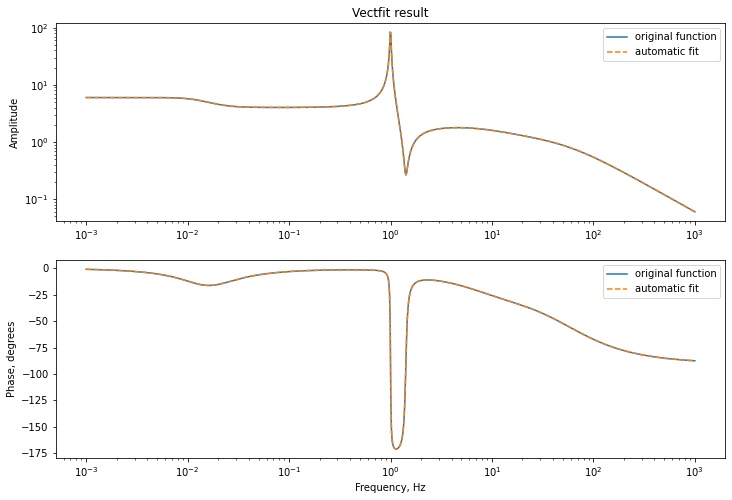

Test parameters:
poles [Hz]   :
 [ -0.01+0.01j  -0.01-0.01j  -0.01+1.j    -0.01-1.j   -10.  +0.j
 -50.  +0.j  ]
residues [Hz]:
 [ 0.01-0.01j  0.01+0.01j  0.01-1.j    0.01+1.j   10.  -0.j   50.  -0.j  ]
offset       :
 0
slope [1/Hz] :
 0.0

Fitted parameters:
poles [Hz]   :
 [-50.  +0.j   -10.  +0.j    -0.01-0.01j  -0.01+0.01j  -0.01-1.j
  -0.01+1.j  ]
residues [Hz]:
 [50.  +0.j   10.  +0.j    0.01+0.01j  0.01-0.01j  0.01+1.j    0.01-1.j  ]
offset       :
 -1.5478729409323932e-12
slope [1/Hz] :
 0.0


In [2]:
# List of frequencies in Hz
freqs=np.logspace(-3,3,1000)
# List of arguments of the transfer function in the Laplace domain
s = 2*np.pi*freqs*1j

# Test transfer function 1, given by poles, residues, offset, and slope:
#given in zpk format (zeros, poles, gain):
tst_poles = 2*np.pi*np.array([-1e-2+1e-2j,-1e-2-1e-2j,-1e-2+1j,-1e-2-1j,-1e1,-5e1]) # poles
tst_residues = -tst_poles # residues
tst_d=0 # offset (optional)
tst_h=0 # slope (optional)

# Evaluation of test function 1: list of complex values to fit
tst_tf = vectfit.model_polres(s, tst_poles, tst_residues, tst_d, tst_h)

# Vector fitting
# 1. using default parameters (10 iterations, 10 complex pole pairs), make a plot
fit1_poles, fit1_residues, fit1_d, fit1_h = \
    vectfit.vectfit_auto(tst_tf, s, show=True) 

# 2. giving an explicit number of poles (2 complex conjugated pairs and 2 real poles, 10 iterations)
fit2_poles, fit2_residues, fit2_d, fit2_h = \
    vectfit.vectfit_auto(tst_tf, s, n_complex_pairs=2, n_real_poles=2) 

print("Test parameters:")
print("================")
vectfit.print_params(tst_poles, tst_residues, tst_d, tst_h, switch_to_Hz = True)
print()

print("Fitted parameters:")
print("==================")
vectfit.print_params(fit2_poles, fit2_residues, fit2_d, fit2_h, switch_to_Hz = True)

## From residues to zeros, poles, and gain (zpk)

As in the original MATLAB package, results produced by `vectfit_auto()` are returned in the form of $N_p$ poles $a_m$, $N_p$ residues $c_m$, offset $d$, and slope $e$. This package, however, also includes function `polres_to_zpk()` that allows for switching into zpk formalism, so that the resulting transfer function is expressed as
$$T(s) = \sum\limits_{m=1}^{N_p} \frac{c_m}{s-a_m} + d + e s = k \frac{\prod_{n=1}^{N_z} (s-z_n)}{ \prod_{m=1}^{N_p} (s-a_m)},$$
where $z_n$ are the zeros, $k$ is the total gain (that can be complex), and $N_z$ is the number of zeros. Note that due to the nature of the pole-residue representation, the number of zeros in the fit is fixed by the number of poles:
* If $d = 0$ and $e = 0$ then $N_z = N_p - 1$;
* If $d \ne 0$ and $e = 0$ then $N_z = N_p$;
* If $e \ne 0$ then $N_z = N_p + 1$

##### Special case of complex total gain k ($\mathrm{Im~} k \ne 0$)
A special case where `vectfit` does not work too well yet is the case where the transfer function has _complex_ total gain $k$, $\Im k \ne 0$. Due to internal representations of functions in matrix calculations, fitting in this case requires calling `vectfit_auto()` with `allow_unstable=True` argument setting, even if the resulting poles are stable, plus the number of specified complex pairs should be significantly higher than the number of actual complex pairs. This issue will be addressed in the future.

##### Evaluating zpk transfer functions
A transfer function that is defined by zeros, poles, and gain can be evaluated at points given by array `s` using function `model_zpk(s, zeros, poles, k)`.

## Example with zpk fitting

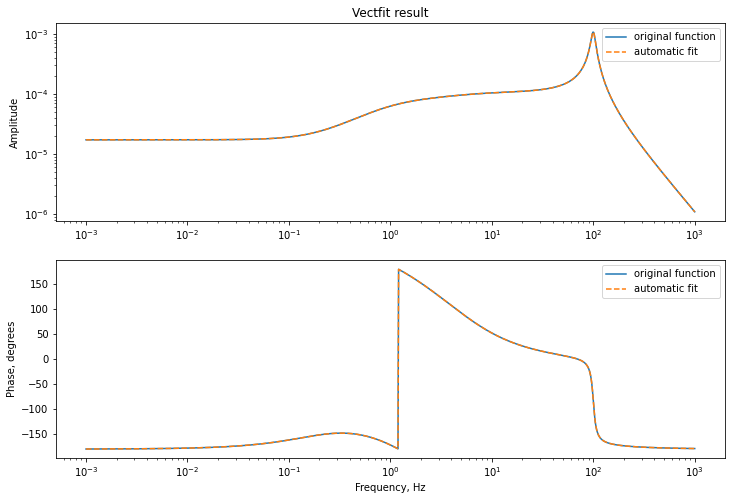

Test parameters:
zeros [Hz]   :
 [-0.2  4. ]
poles [Hz]   :
 [-5.  +0.j -1.  +0.j -5.-100.j -5.+100.j]
k            :
 42.42

Fitted parameters:
zeros [Hz]   :
 [-1.72e+14-0.j -2.00e-01+0.j  4.00e+00+0.j]
poles [Hz]   :
 [-5.  +0.j -5.-100.j -5.+100.j -1.  +0.j]
k            :
 42.42


In [3]:
# Defining transfer function with poles and zeros
tst_poles = 2*np.pi*np.array([-5, -1, -5-100j, -5+100j])
tst_zeros = 2*np.pi*np.array([-0.2, 4])
tst_k = 42.42 # total gain
# tst_k = 42.42+50j # complex total gain

# Evaluation of the test transfer function
tst_tf = vectfit.model_zpk(s, tst_zeros, tst_poles, tst_k)

# Fitting the transfer function
fit_poles, fit_residues, fit_d, fit_h = \
    vectfit.vectfit_auto(tst_tf, s, n_complex_pairs=1, n_real_poles=2, n_iter = 10, show=True) 

# # Replace the above with the commented function call below to fit the case of complex total gain k
# fit_poles, fit_residues, fit_d, fit_h = \
#     vectfit.vectfit_auto(tst_tf, s, n_complex_pairs=10, n_real_poles=2, n_iter = 100, allow_unstable=True, show=True) 

# Converting results into zpk
fit_zeros,fit_poles,fit_k = vectfit.polres_to_zpk(fit_poles, fit_residues, d=0, h=0)

print("Test parameters:")
print("================")
vectfit.print_zpk_params(tst_zeros, tst_poles, tst_k, switch_to_Hz = True)
print()

print("Fitted parameters:")
print("==================")
vectfit.print_zpk_params(fit_zeros, fit_poles, tst_k, switch_to_Hz = True)